In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../dataset/MAIN_happ_temp_cw_gg_pop_pm_co2.csv')

In [3]:
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


In [4]:
df = df[df['Year'] <= 2018]

In [5]:
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2011,3.832,16.487,50.82785,58650.0,30117411.0,57.09972,12105788.0
2,Afghanistan,2012,3.783,14.373,53.40352,66750.0,31161378.0,55.46611,10218514.0
3,Afghanistan,2013,3.572,16.156,56.01404,74800.0,32269592.0,59.62277,8440766.0
4,Afghanistan,2014,3.131,15.647,58.65937,84620.0,33370804.0,62.72192,7774340.0


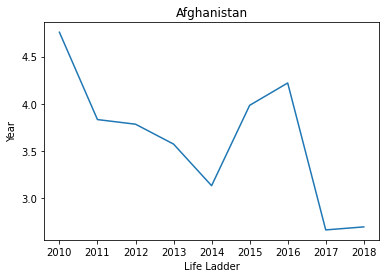

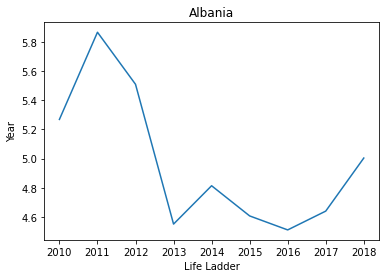

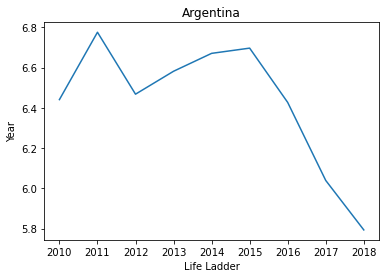

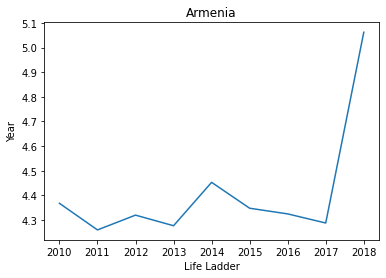

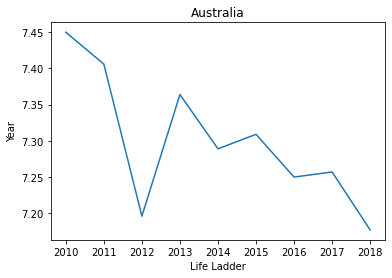

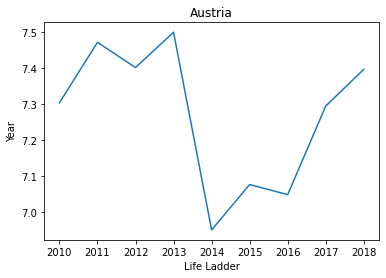

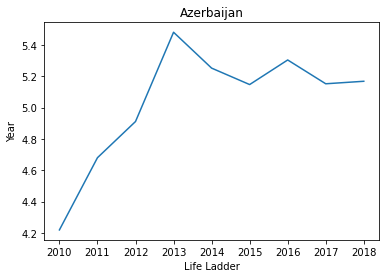

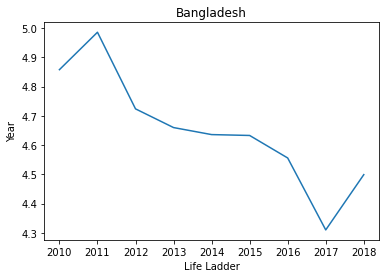

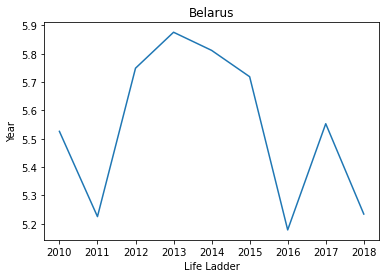

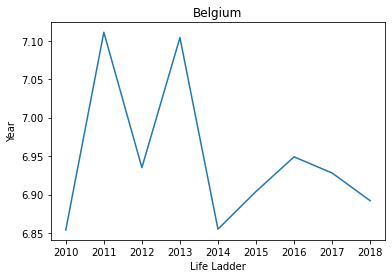

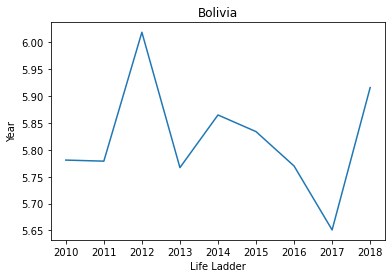

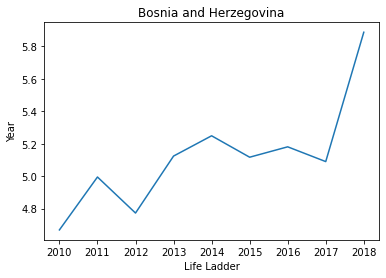

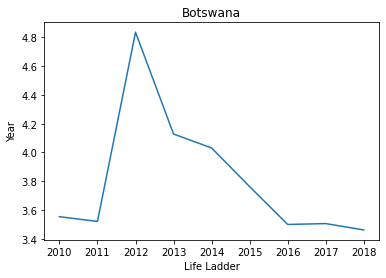

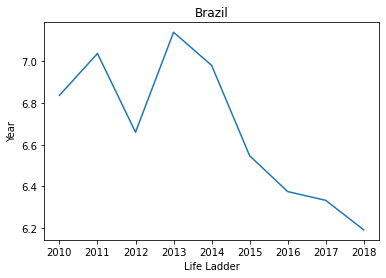

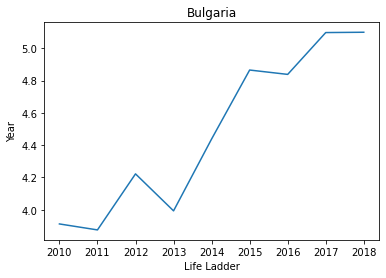

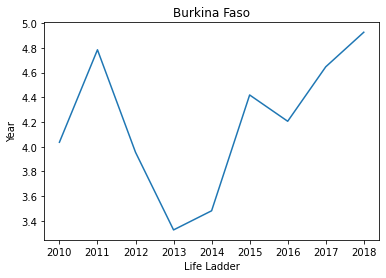

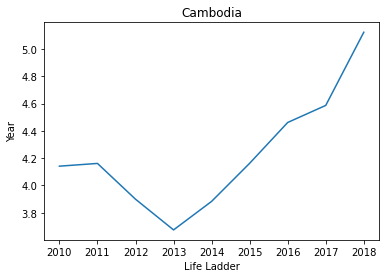

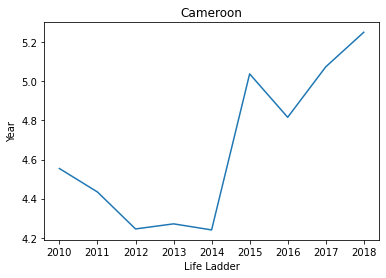

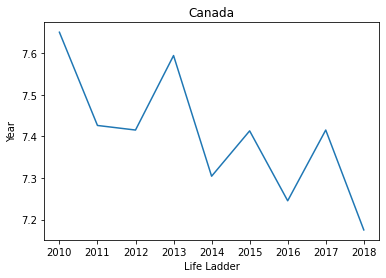

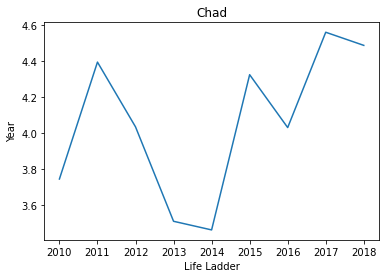

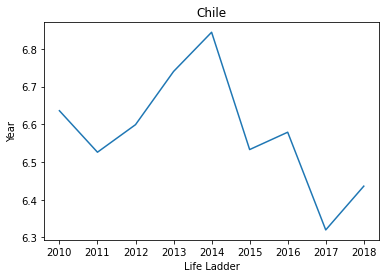

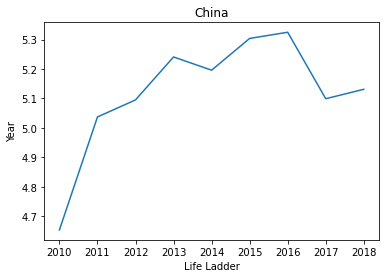

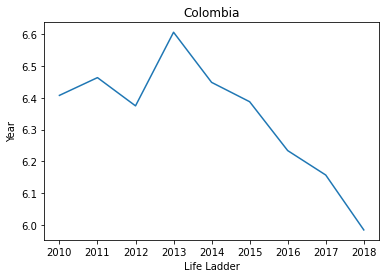

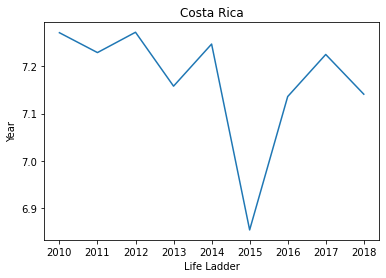

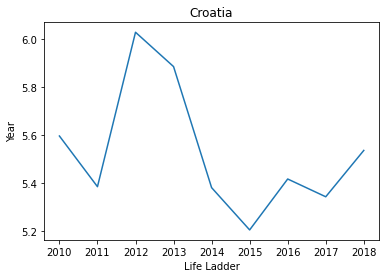

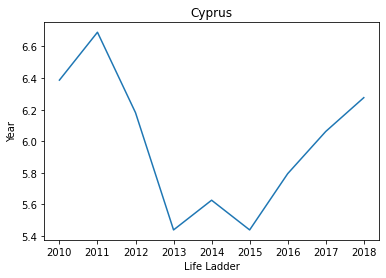

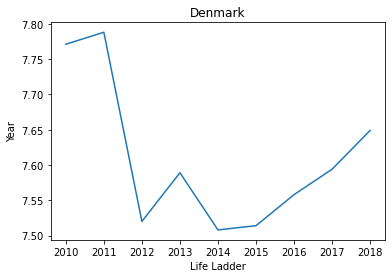

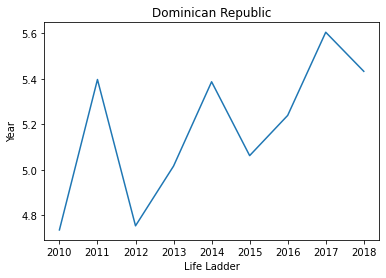

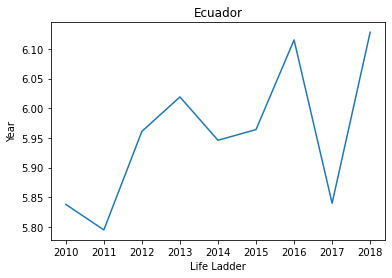

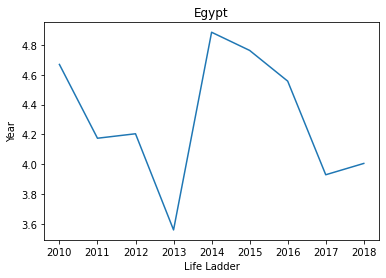

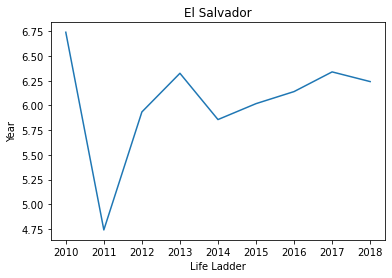

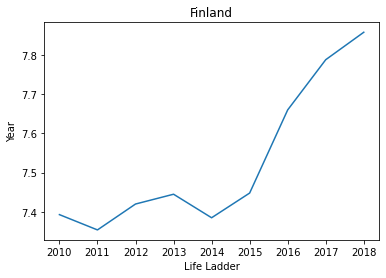

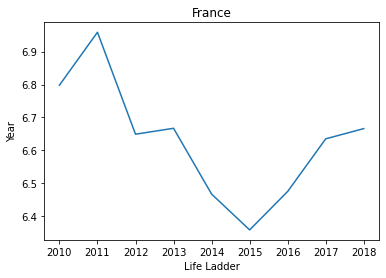

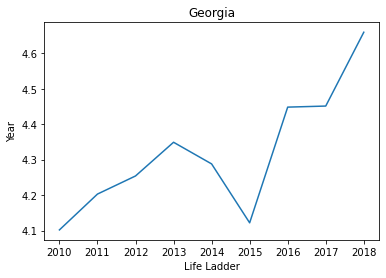

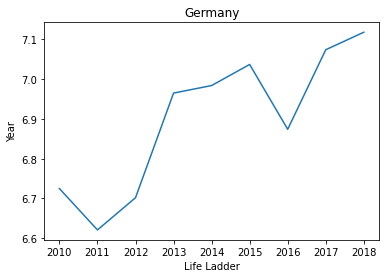

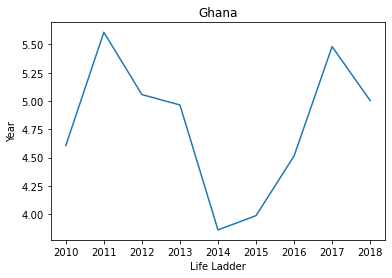

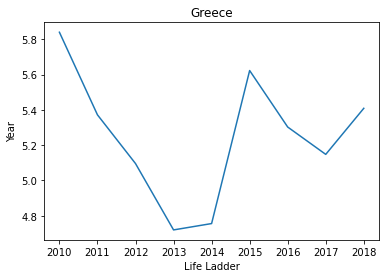

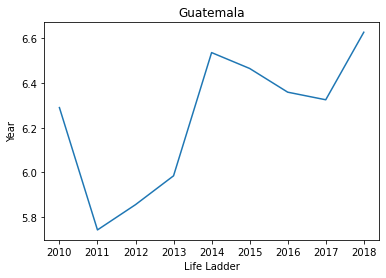

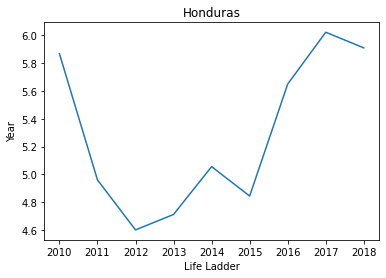

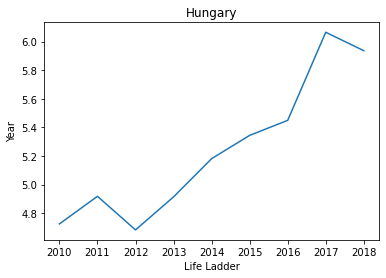

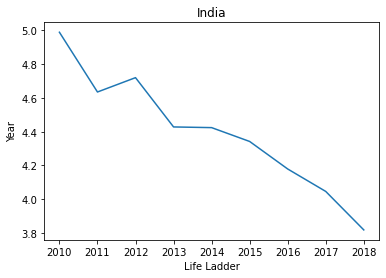

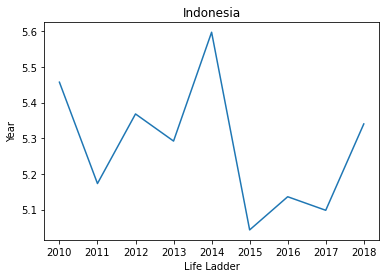

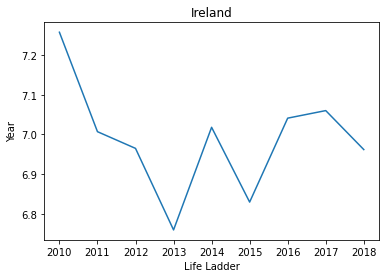

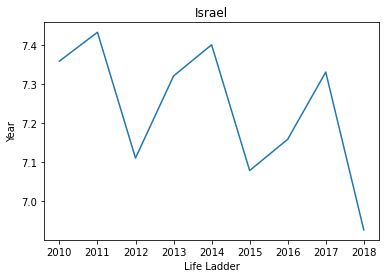

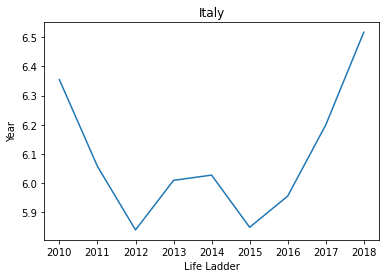

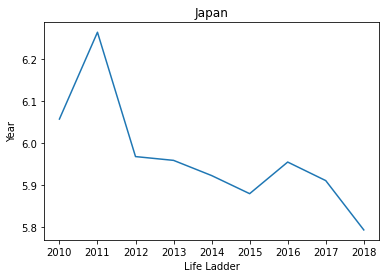

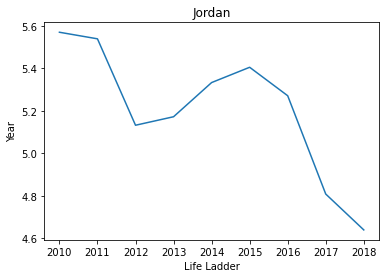

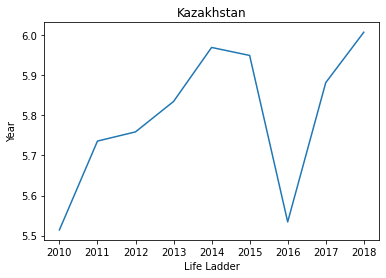

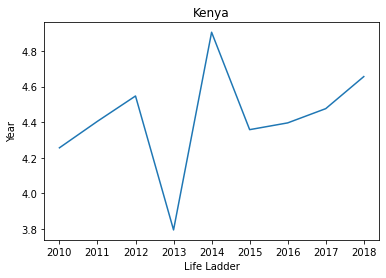

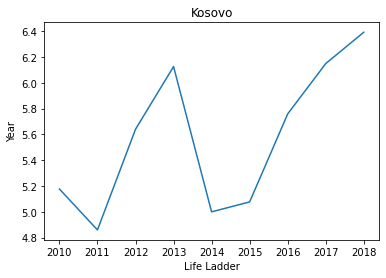

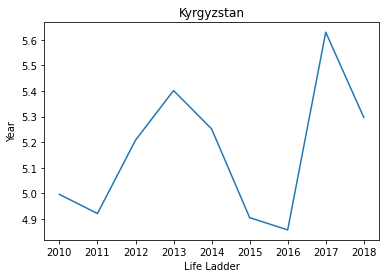

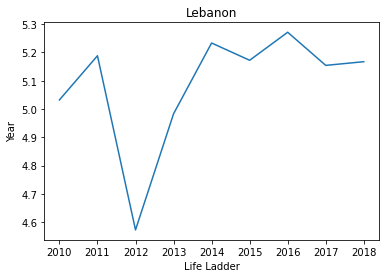

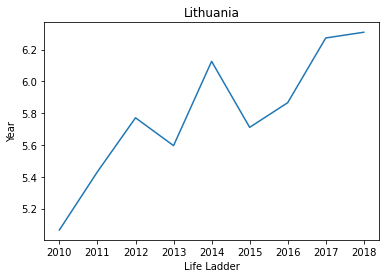

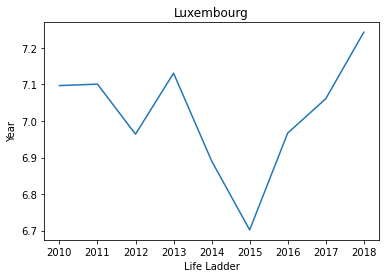

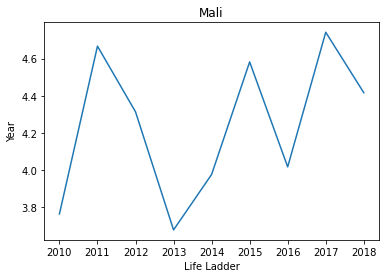

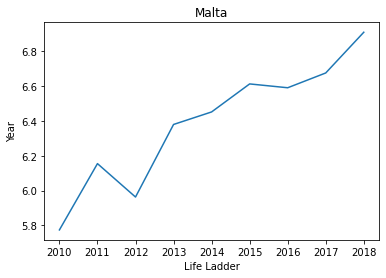

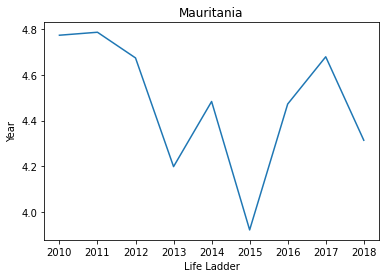

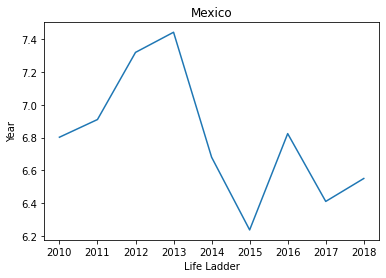

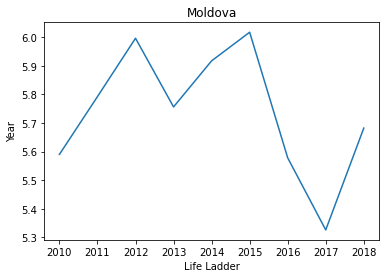

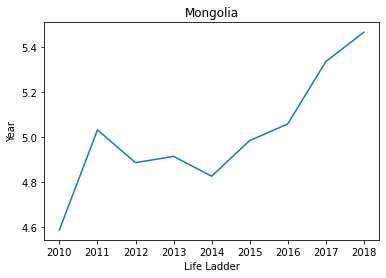

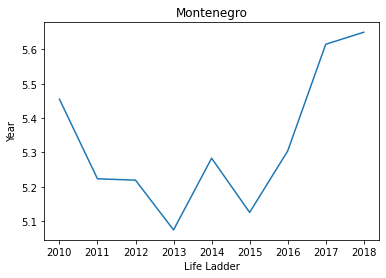

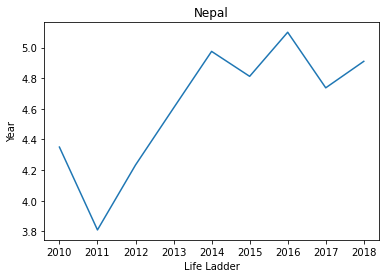

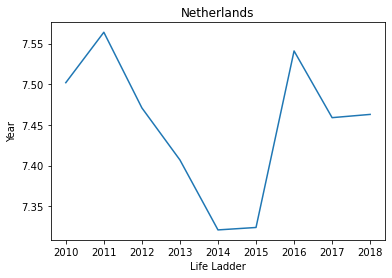

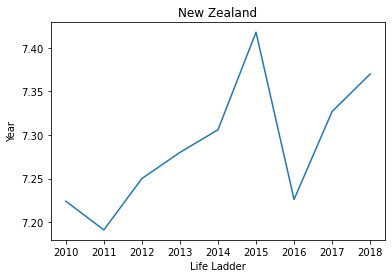

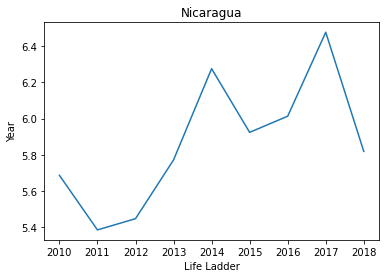

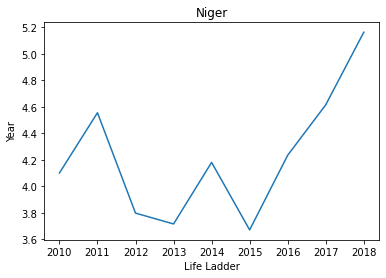

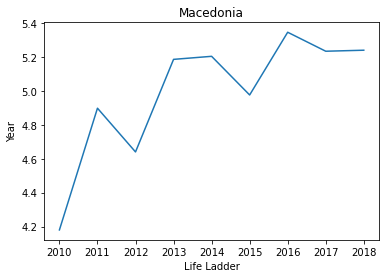

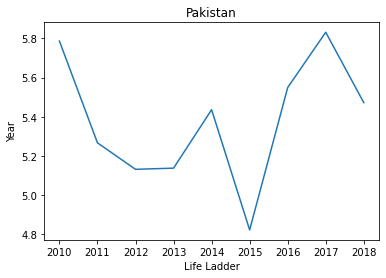

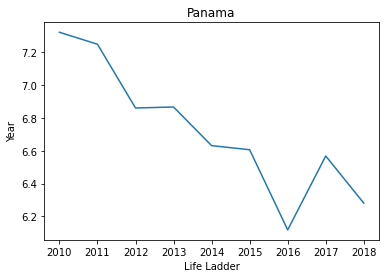

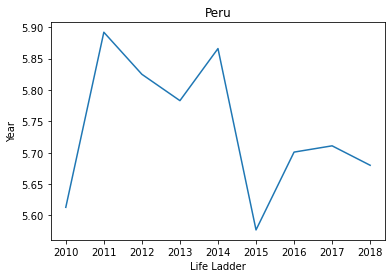

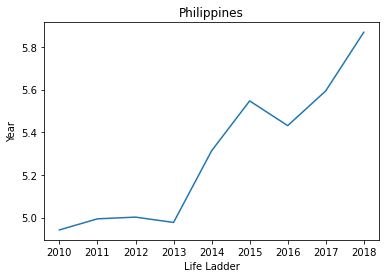

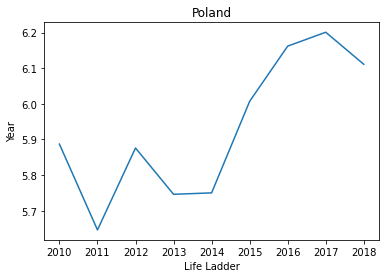

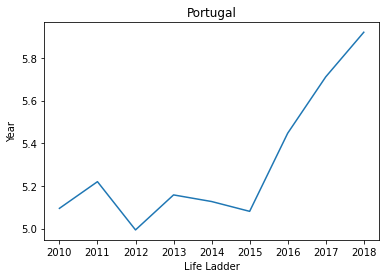

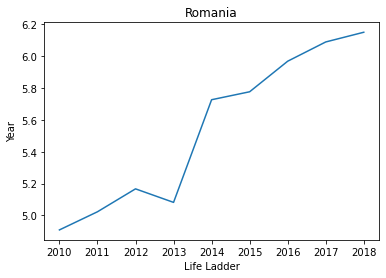

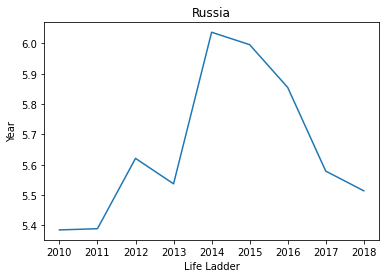

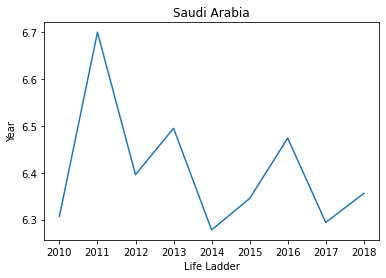

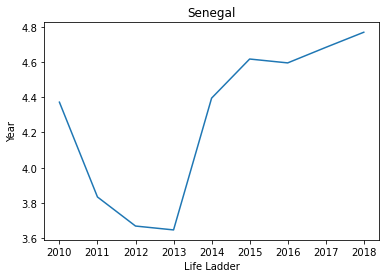

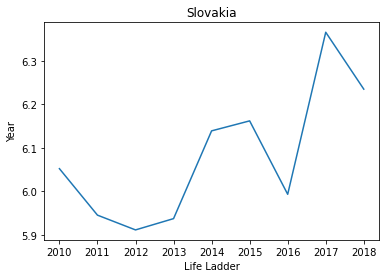

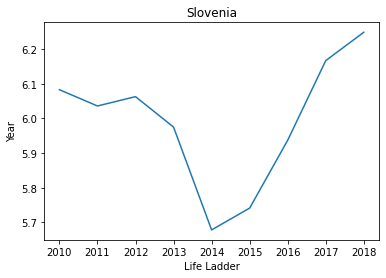

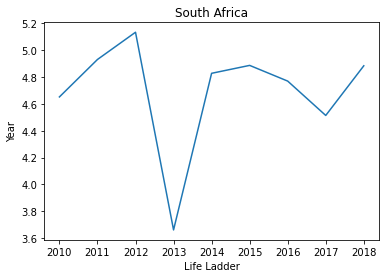

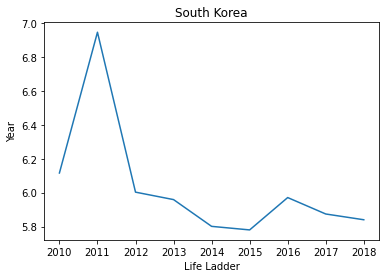

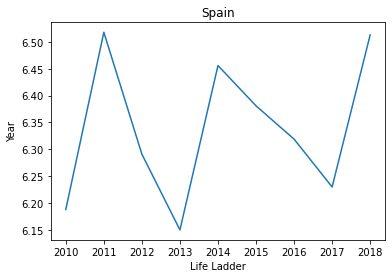

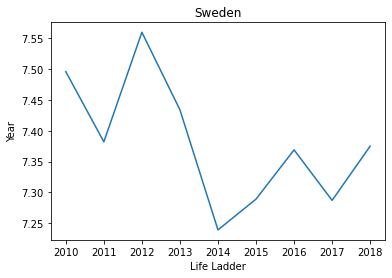

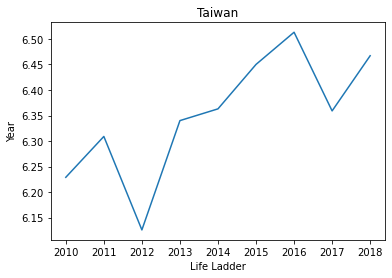

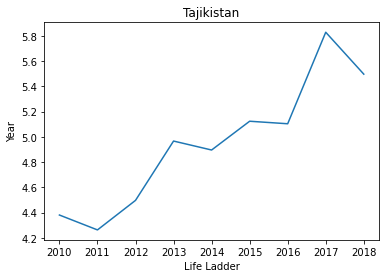

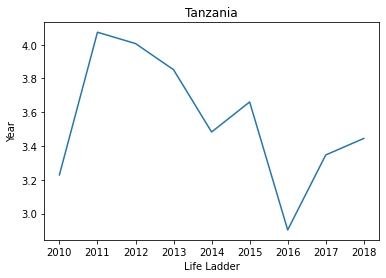

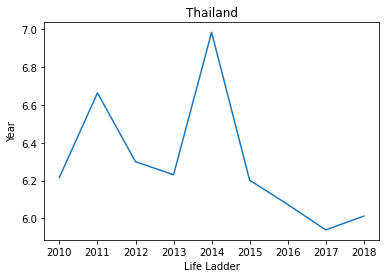

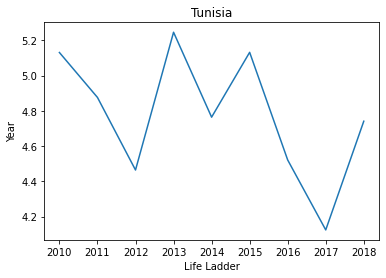

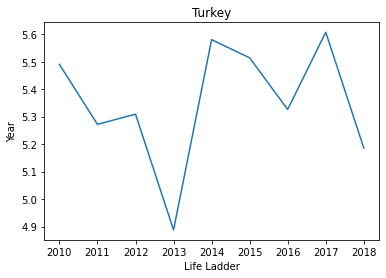

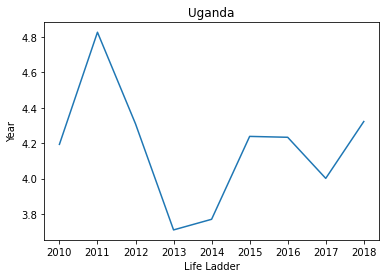

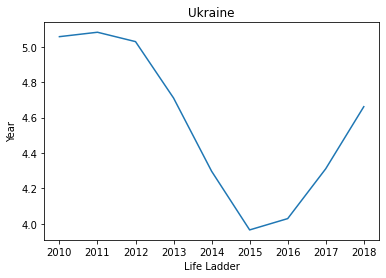

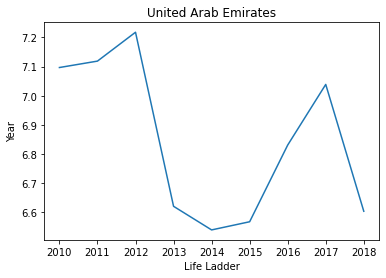

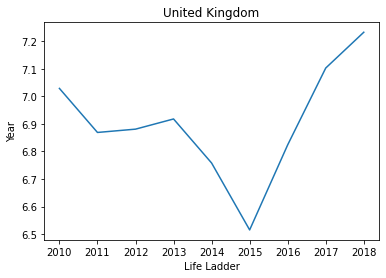

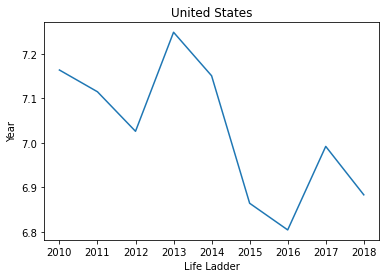

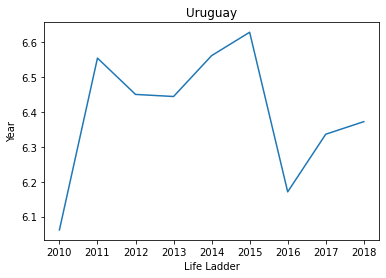

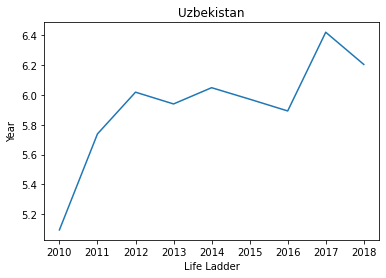

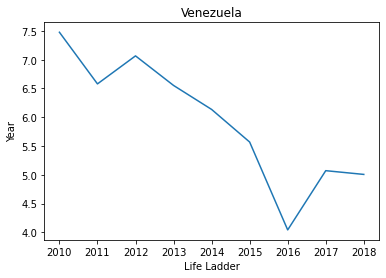

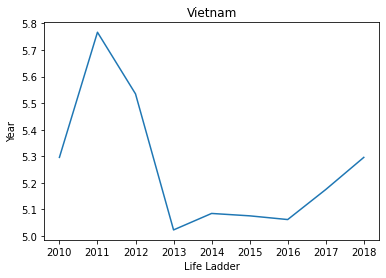

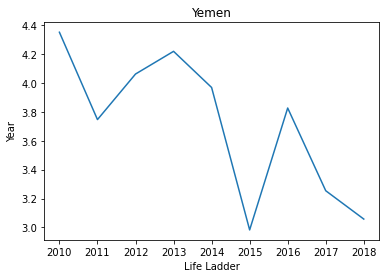

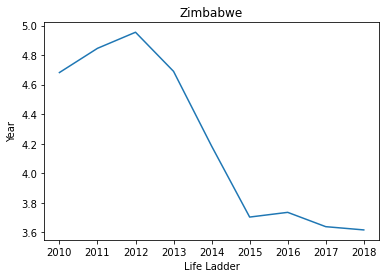

In [6]:
# plot Life Ladder through years for every country, very inconvenient way
for country in df['Country'].unique():
    plt.plot(df['Year'].unique(), df['Life Ladder'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('Life Ladder')
    plt.ylabel('Year')
    plt.show()

In [7]:
# get changes by data in 2018 minus data in 2010
change_df = df[(df['Year'] == 2010) | (df['Year'] == 2018)]
change_df.reset_index(drop=True, inplace=True)
change_df

,Country,Year,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,44910.0,29185511.0,52.49585,8397779.0
1,Afghanistan,2018,2.694,15.942,69.60193,98920.0,37171922.0,53.43221,10452666.0
2,Albania,2010,5.269,13.779,91.37948,9130.0,2913021.0,21.55726,4448096.0
3,Albania,2018,5.004,14.259,94.43639,10080.0,2866376.0,18.65998,5402999.0
4,Argentina,2010,6.441,15.394,98.42726,334590.0,40788453.0,14.05373,186733136.0
...,...,...,...,...,...,...,...,...,...
195,Vietnam,2018,5.296,24.517,95.51497,376530.0,95545959.0,20.36473,211774129.0
196,Yemen,2010,4.350,27.869,50.52801,35610.0,23154854.0,44.82450,23151864.0
197,Yemen,2018,3.058,27.651,58.75449,21760.0,28498683.0,45.31726,9945288.0
198,Zimbabwe,2010,4.682,21.614,67.54071,28080.0,12697728.0,24.64780,7864221.0


In [8]:
# country and year columns are not needed and therefore removed
# then use diff() for every row to get the change between each row
change_df = change_df[['Life Ladder','Temperature','Clean Water','Greenhouse Gas Emissions','Population','PM2.5', 'CO2 Emissions']].diff(periods=1)

In [9]:
# first row is null value since it has nothing to subtract, dropped and reset index here
change_df = change_df[1:]
change_df.reset_index(drop=True)

,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,-2.064,1.313,21.31485,54010.0,7986411.0,0.93636,2054887.0
1,2.575,-2.163,21.77755,-89790.0,-34258901.0,-31.87495,-6004570.0
2,-0.265,0.480,3.05691,950.0,-46645.0,-2.89728,954903.0
3,1.437,1.135,3.99087,324510.0,37922077.0,-4.60625,181330137.0
4,-0.648,-1.136,1.25586,31060.0,3706049.0,-0.08070,-1703239.0
...,...,...,...,...,...,...,...
194,0.000,-0.704,6.65121,118100.0,7578304.0,-6.75337,75661039.0
195,-0.946,3.352,-44.98696,-340920.0,-72391105.0,24.45977,-188622265.0
196,-1.292,-0.218,8.22648,-13850.0,5343829.0,0.49276,-13206576.0
197,1.624,-6.037,8.78622,6320.0,-15800955.0,-20.66946,-2081067.0


In [10]:
# slice df every 2 rows since calculation was 2018-2010, therefore even rows aren't needed here
change_df = change_df.iloc[::2]

# reset index again
change_df.reset_index(drop=True, inplace=True)

# get the country column from original df and add to the df with calculation
change_df['Country'] = df['Country'].unique()

# rearrange columns
change_df = change_df[['Country', 'Life Ladder', 'Temperature', 'Clean Water', 'Greenhouse Gas Emissions', 'Population', 'PM2.5', 'CO2 Emissions']]
change_df.head()

,Country,Life Ladder,Temperature,Clean Water,Greenhouse Gas Emissions,Population,PM2.5,CO2 Emissions
0,Afghanistan,-2.064,1.313,21.31485,54010.0,7986411.0,0.93636,2054887.0
1,Albania,-0.265,0.480,3.05691,950.0,-46645.0,-2.89728,954903.0
2,Argentina,-0.648,-1.136,1.25586,31060.0,3706049.0,-0.08070,-1703239.0
3,Armenia,0.694,-1.233,1.75144,1610.0,74427.0,-1.56172,2043853.0
4,Australia,-0.273,-0.073,0.08674,44160.0,2950938.0,-0.04608,10451148.0


In [11]:
# find top 10 change in each column
life_ladder_top_10 = change_df.sort_values(by='Life Ladder', ascending=False)[:10]
list(life_ladder_top_10['Country'])

['Lithuania',
 'Romania',
 'Bosnia and Herzegovina',
 'Kosovo',
 'Hungary',
 'Bulgaria',
 'Malta',
 'Tajikistan',
 'Uzbekistan',
 'Niger']

<AxesSubplot:title={'center':'Changes in Life Ladder Score from 2010 to 2018'}, xlabel='Country'>

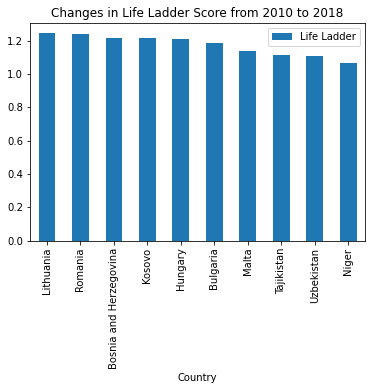

In [47]:
life_ladder_top_10.plot(kind='bar', x='Country', y='Life Ladder', title='Changes in Life Ladder Score from 2010 to 2018')

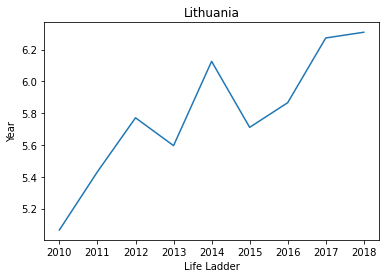

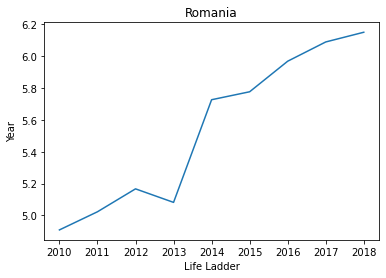

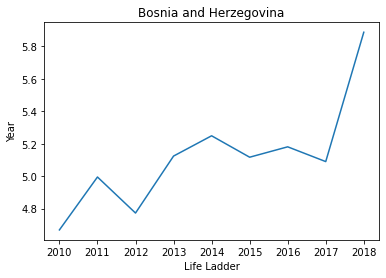

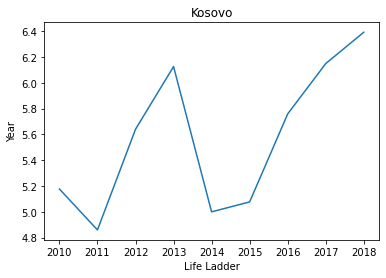

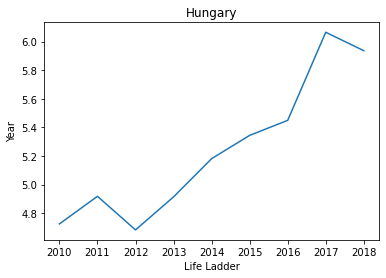

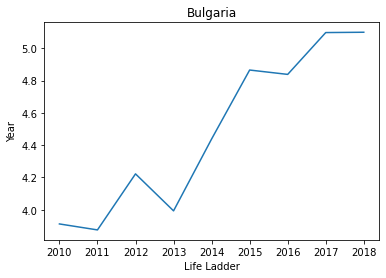

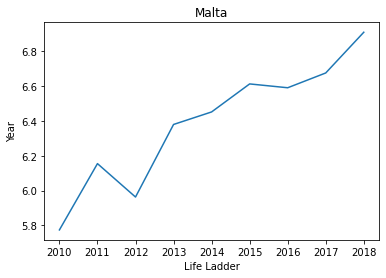

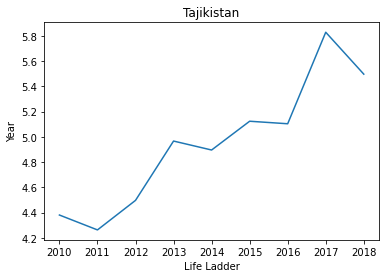

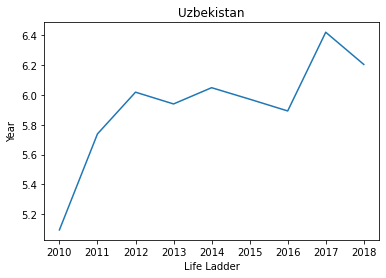

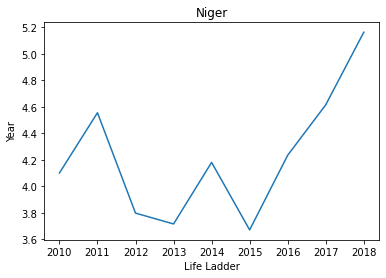

In [46]:
for country in life_ladder_top_10['Country']:
    plt.plot(df['Year'].unique(), df[df['Country'] == country]['Life Ladder'])
    plt.title(country)
    plt.xlabel('Life Ladder')
    plt.ylabel('Year')
    plt.show()

In [13]:
temperature_top_10 = change_df.sort_values(by='Temperature', ascending=False)[:10]
list(temperature_top_10['Country'])

['Germany',
 'Botswana',
 'Tajikistan',
 'Sweden',
 'Pakistan',
 'Poland',
 'Afghanistan',
 'Slovakia',
 'Hungary',
 'Taiwan']

<AxesSubplot:title={'center':'Changes in Temperature from 2010 to 2018'}, xlabel='Country'>

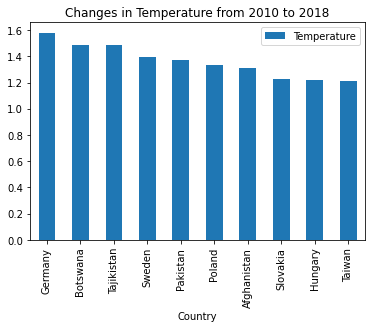

In [45]:
temperature_top_10.plot(kind='bar', x='Country', y='Temperature', title='Changes in Temperature from 2010 to 2018')

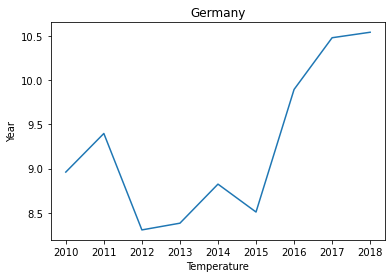

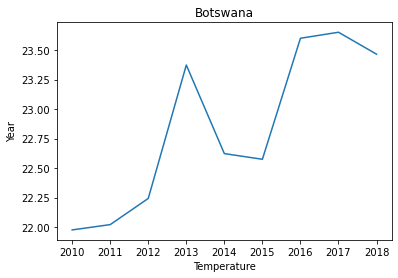

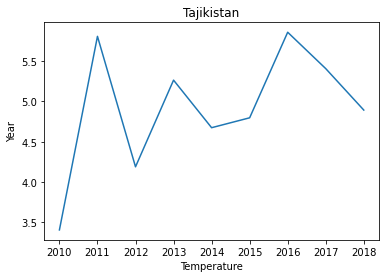

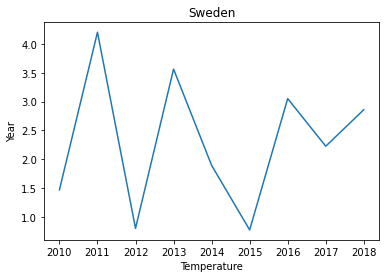

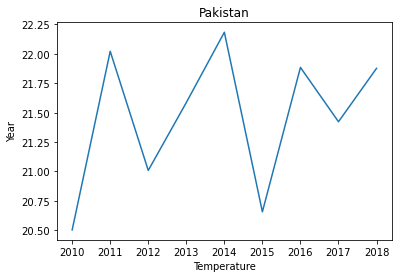

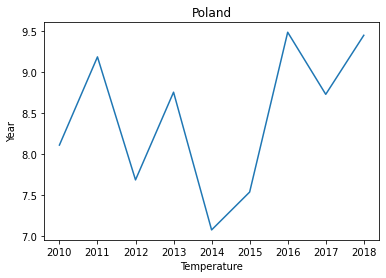

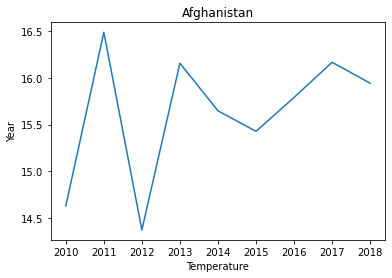

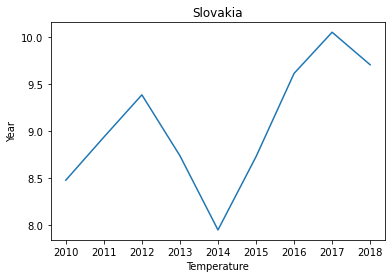

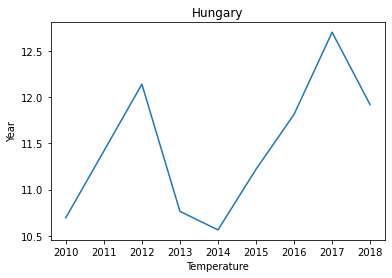

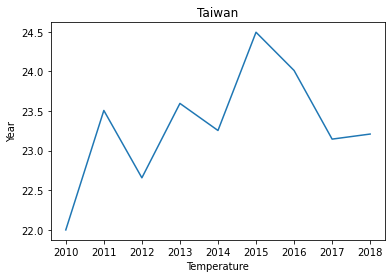

In [14]:
for country in temperature_top_10['Country']:
    plt.plot(df['Year'].unique(), df['Temperature'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('Temperature')
    plt.ylabel('Year')
    plt.show()

In [15]:
clean_water_top_10 = change_df.sort_values(by='Clean Water', ascending=False)[:10]
list(clean_water_top_10['Country'])

['Afghanistan',
 'Tanzania',
 'Mauritania',
 'Mali',
 'Uganda',
 'Tajikistan',
 'Senegal',
 'Ghana',
 'Azerbaijan',
 'Yemen']

<AxesSubplot:title={'center':'Changes in Access to Clean Water from 2010 to 2018'}, xlabel='Country'>

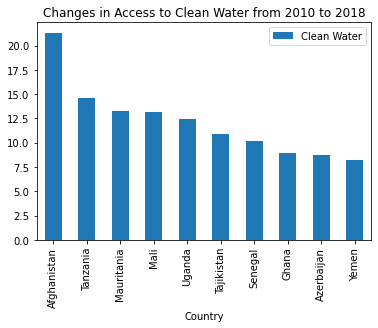

In [44]:
clean_water_top_10.plot(kind='bar', x='Country', y='Clean Water', title='Changes in Access to Clean Water from 2010 to 2018')

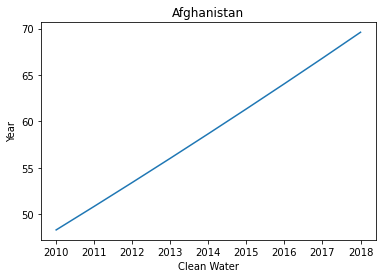

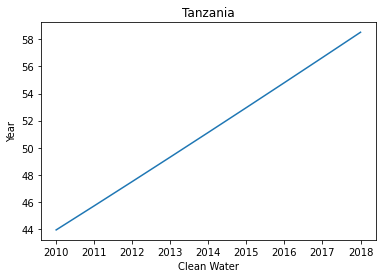

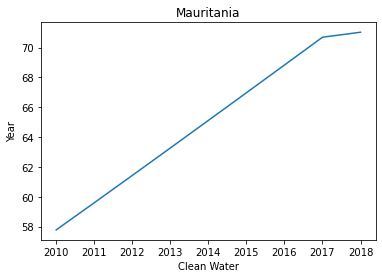

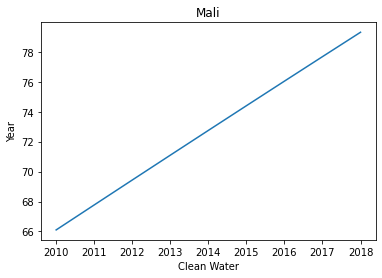

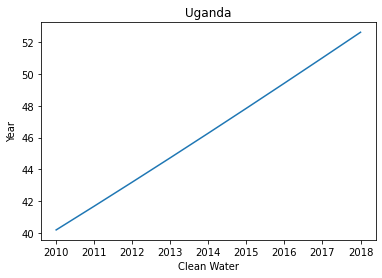

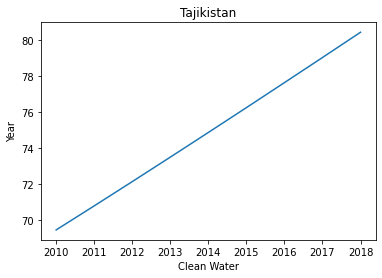

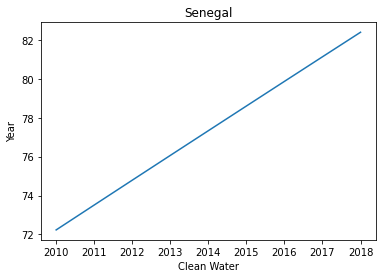

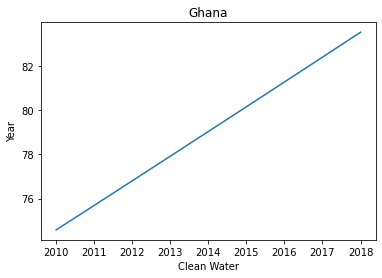

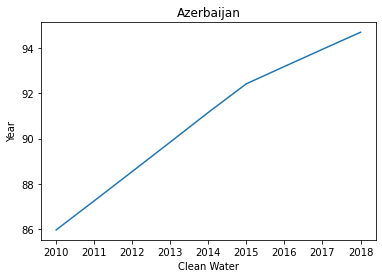

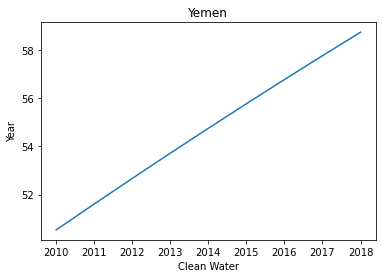

In [16]:
for country in clean_water_top_10['Country']:
    plt.plot(df['Year'].unique(), df['Clean Water'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('Clean Water')
    plt.ylabel('Year')
    plt.show()

In [17]:
ghg_top_10 = change_df.sort_values(by='Greenhouse Gas Emissions', ascending=False)[:10]
list(ghg_top_10['Country'])

['China',
 'India',
 'Indonesia',
 'Turkey',
 'Saudi Arabia',
 'Vietnam',
 'Pakistan',
 'Russia',
 'South Korea',
 'Philippines']

<AxesSubplot:title={'center':'Changes in Greenhouse Gas Emissions from 2010 to 2018'}, xlabel='Country'>

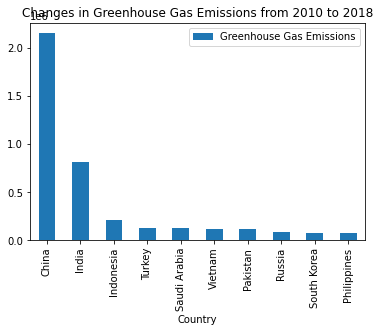

In [43]:
ghg_top_10.plot(kind='bar', x='Country', y='Greenhouse Gas Emissions', title='Changes in Greenhouse Gas Emissions from 2010 to 2018')

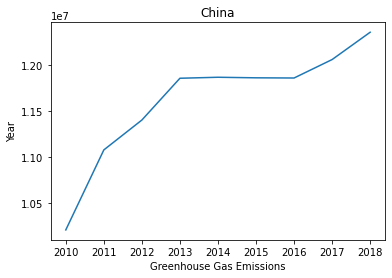

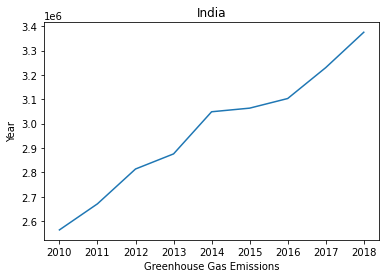

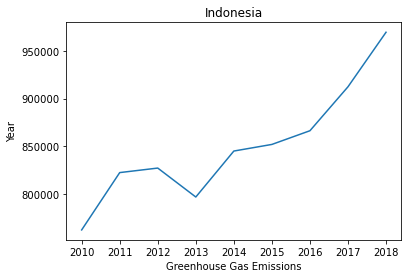

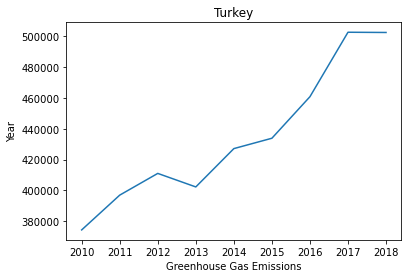

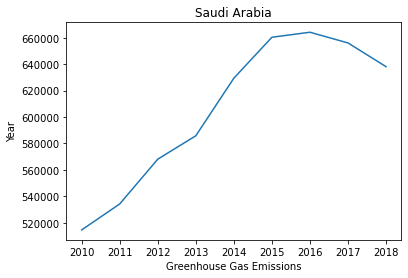

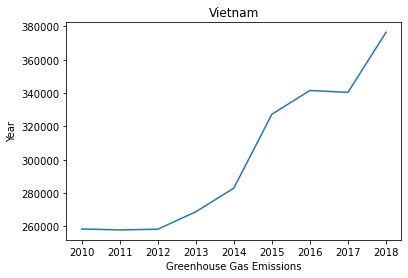

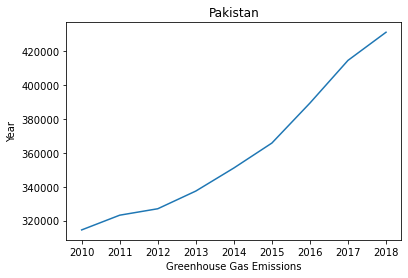

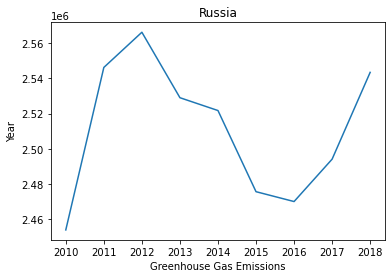

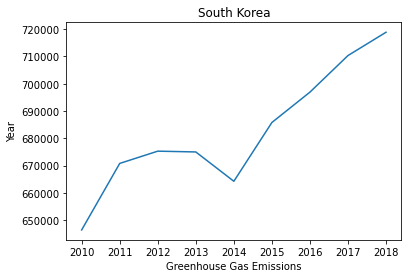

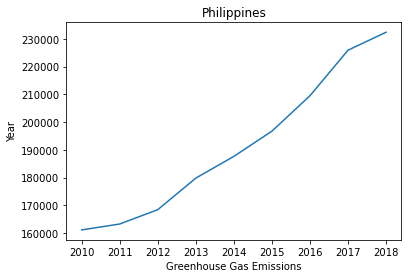

In [18]:
for country in ghg_top_10['Country']:
    plt.plot(df['Year'].unique(), df['Greenhouse Gas Emissions'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('Greenhouse Gas Emissions')
    plt.ylabel('Year')
    plt.show()

In [19]:
population_top_10 = change_df.sort_values(by='Population', ascending=False)[:10]
list(population_top_10['Country'])

['India',
 'China',
 'Pakistan',
 'Indonesia',
 'United States',
 'Egypt',
 'Bangladesh',
 'Brazil',
 'Philippines',
 'Mexico']

<AxesSubplot:title={'center':'Changes in Population from 2010 to 2018'}, xlabel='Country'>

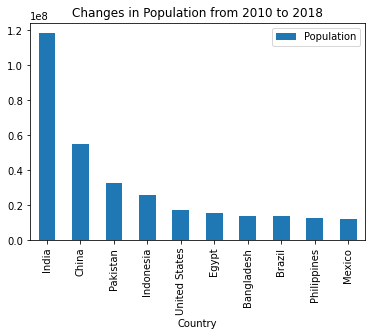

In [42]:
population_top_10.plot(kind='bar', x='Country', y='Population', title='Changes in Population from 2010 to 2018')

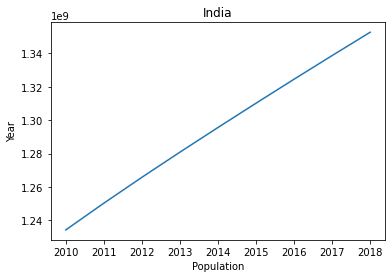

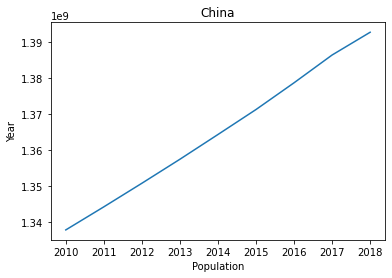

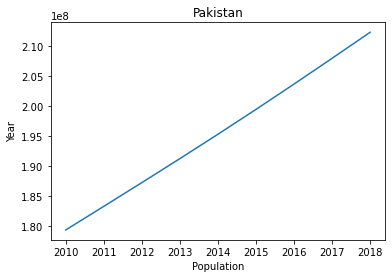

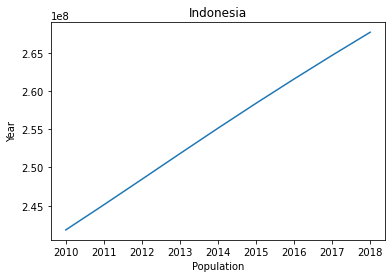

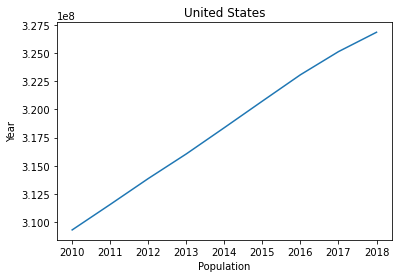

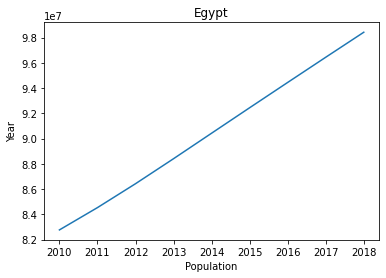

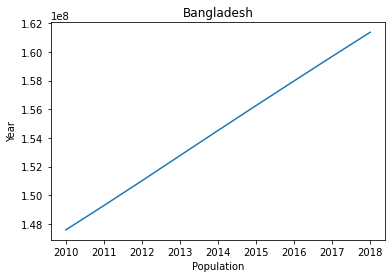

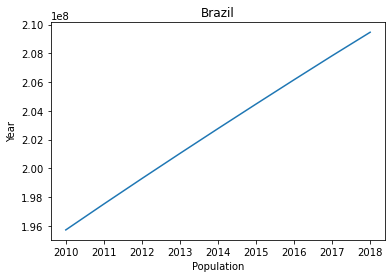

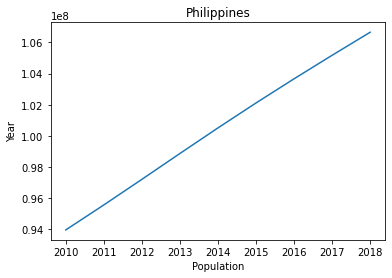

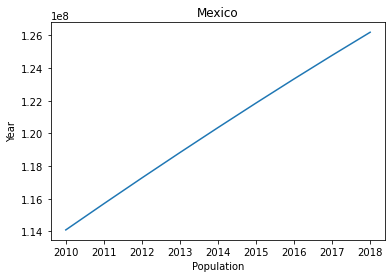

In [20]:
for country in population_top_10['Country']:
    plt.plot(df['Year'].unique(), df['Population'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('Population')
    plt.ylabel('Year')
    plt.show()

In [21]:
pm25_top_10 = change_df.sort_values(by='PM2.5', ascending=False)[:10]
list(pm25_top_10['Country'])

['Bangladesh',
 'India',
 'Mongolia',
 'Cameroon',
 'South Korea',
 'Nepal',
 'Ghana',
 'Senegal',
 'Tajikistan',
 'Pakistan']

<AxesSubplot:title={'center':'Changes in PM2.5 air matter from 2010 to 2018'}, xlabel='Country'>

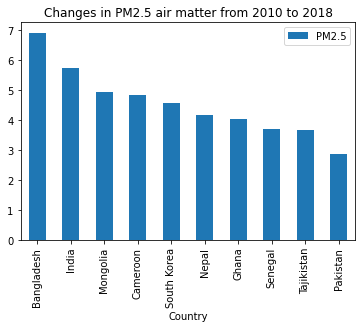

In [41]:
pm25_top_10.plot(kind='bar', x='Country', y='PM2.5', title='Changes in PM2.5 air matter from 2010 to 2018')

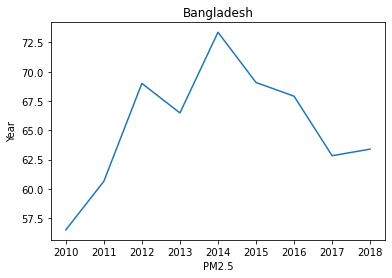

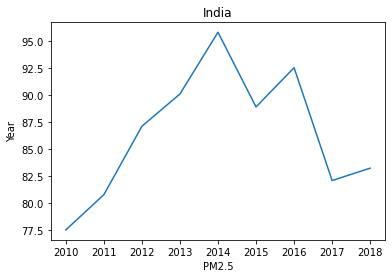

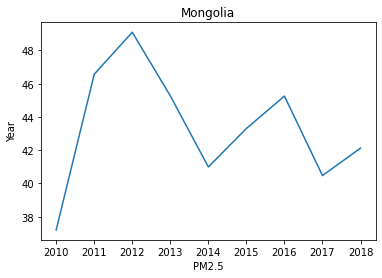

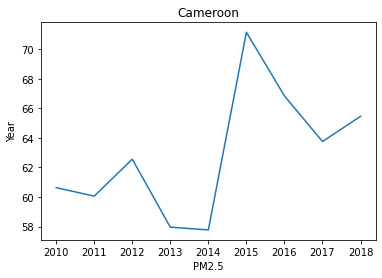

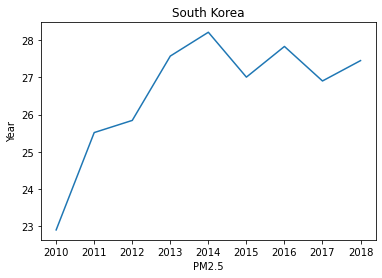

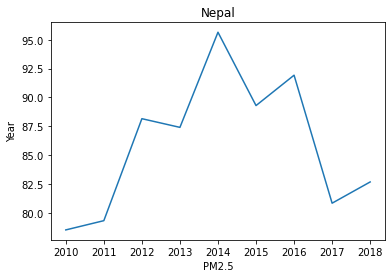

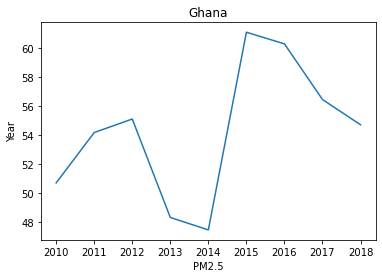

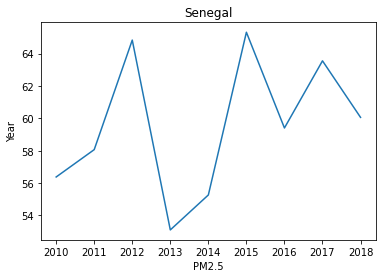

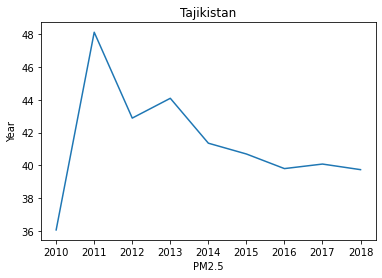

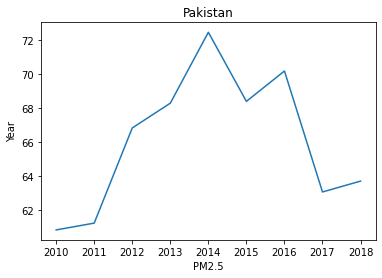

In [22]:
for country in pm25_top_10['Country']:
    plt.plot(df['Year'].unique(), df['PM2.5'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('PM2.5')
    plt.ylabel('Year')
    plt.show()

In [38]:
co2_top_10 = change_df.sort_values(by='CO2 Emissions', ascending=False)[:10]
list(co2_top_10['Country'])

['China',
 'India',
 'Indonesia',
 'Turkey',
 'Pakistan',
 'Russia',
 'Vietnam',
 'South Korea',
 'Kazakhstan',
 'Saudi Arabia']

<AxesSubplot:title={'center':'Changes in CO2 Emissions from 2010 to 2018'}, xlabel='Country'>

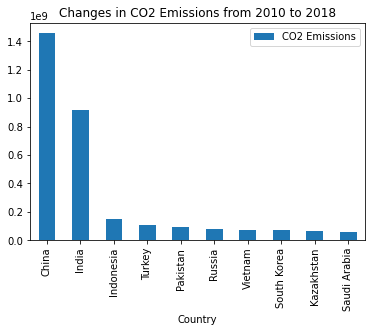

In [36]:
co2_top_10.plot(kind='bar', x='Country', y='CO2 Emissions', title='Changes in CO2 Emissions from 2010 to 2018')

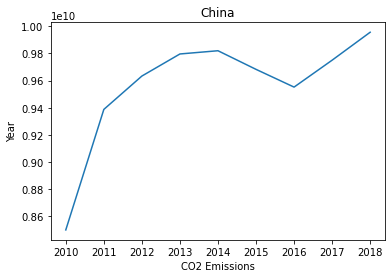

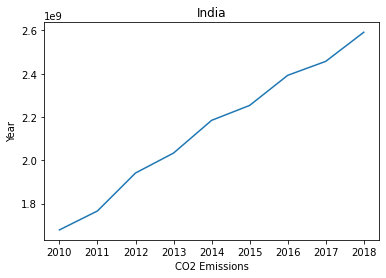

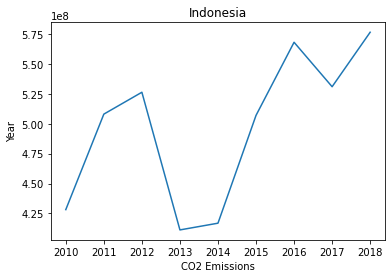

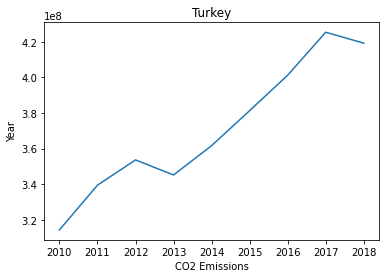

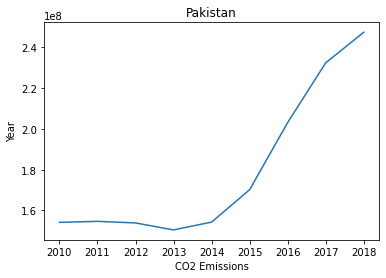

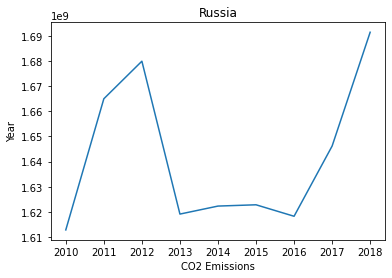

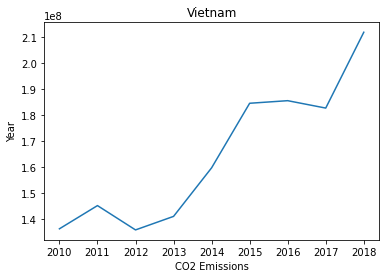

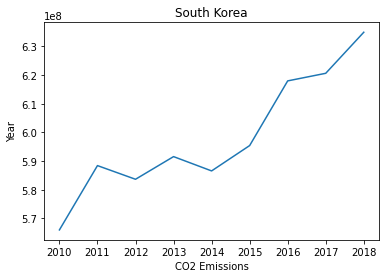

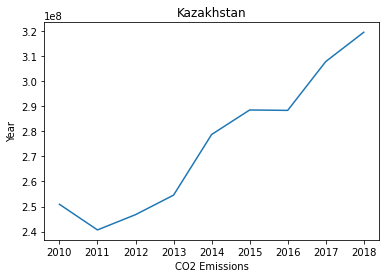

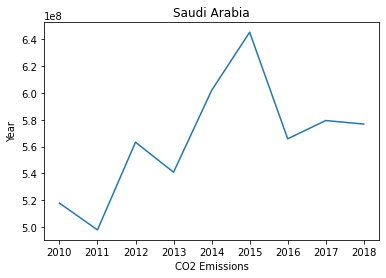

In [24]:
for country in co2_top_10['Country']:
    plt.plot(df['Year'].unique(), df['CO2 Emissions'][df['Country'] == country])
    plt.title(country)
    plt.xlabel('CO2 Emissions')
    plt.ylabel('Year')
    plt.show()